In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

print(cv.__version__)

4.4.0


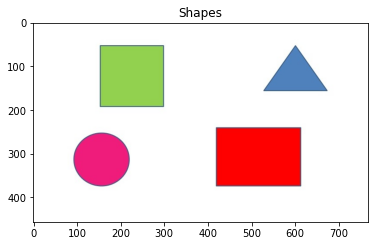

In [2]:
path = 'C:/opencv/opencv/medias/shapes.png'
img = cv.imread(path)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shapes')
plt.show()

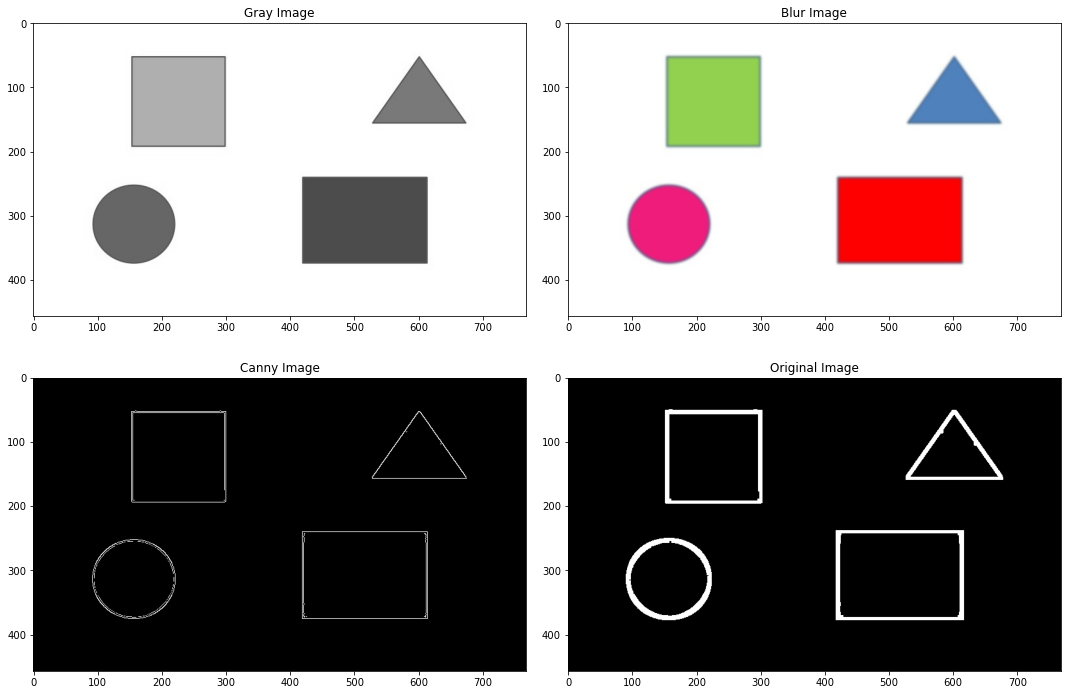

In [3]:
kernel = np.ones((5,5), np.uint8)

Gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
Blur_image = cv.GaussianBlur(img, (9,9), 0)
Canny_image = cv.Canny(img, 150, 300)
Dialation_image = cv.dilate(Canny_image, kernel, iterations=1)

row, col = 2, 2
figure, axis = plt.subplots(row, col, figsize=(15, 10))
figure.tight_layout()

axis[0][0].imshow(cv.cvtColor(Gray_image, cv.COLOR_BGR2RGB))
axis[0][0].set_title('Gray Image')

axis[0][1].imshow(cv.cvtColor(Blur_image, cv.COLOR_BGR2RGB))
axis[0][1].set_title('Blur Image')

axis[1][0].imshow(cv.cvtColor(Canny_image, cv.COLOR_BGR2RGB))
axis[1][0].set_title('Canny Image')

axis[1][1].imshow(cv.cvtColor(Dialation_image, cv.COLOR_BGR2RGB))
axis[1][1].set_title('Original Image')

plt.show()

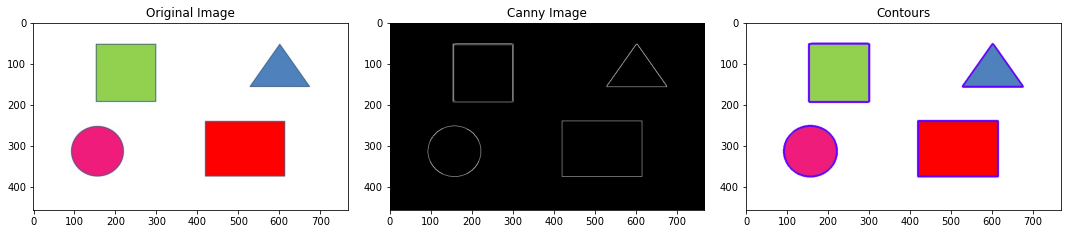

In [4]:
row, col = 1, 3
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgCanny = cv.Canny(imgGray,50,200)
axs[1].imshow(cv.cvtColor(imgCanny, cv.COLOR_BGR2RGB))
axs[1].set_title('Canny Image')

contours, hierarchy = cv.findContours(imgCanny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

imgContour = img.copy() 
cv.drawContours(imgContour, contours, -1, (255,0,100), 3)

axs[2].imshow(cv.cvtColor(imgContour, cv.COLOR_BGR2RGB))
axs[2].set_title('Contours')

plt.show()

In [5]:
def get_contour_area(contours):
    contours, hierarchy = cv.findContours(imgCanny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    area_list = []
    arc_list = []
    approx_list = []
    cnt_coordinates = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        area_list.append(area)
        
        arc_length = cv.arcLength(cnt, True)
        arc_list.append(arc_length)
        
        approx = cv.approxPolyDP(cnt, 0.02*arc_length, True)
        approx_list.append(approx)
        
        x,y,w,h = cv.boundingRect(approx)
        cnt_coordinates.append(x,y,w,h)
    return area_list, arc_list, approx_list, cnt_c



def get_contour_area(contours):
    contours, hierarchy = cv.findContours(imgCanny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    area_list = []
    arc_list = []
    approx_list = []
    cnt_coordinates = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        area_list.append(area)
        arc_length = cv.arcLength(cnt, True)
        arc_list.append(arc_length)
        approx = cv.approxPolyDP(cnt, 0.02*arc_length, True)
        approx_list.append(approx)
    return area_list, arc_list, approx_list, cnt_coordinates

In [6]:
print("Areas are: \n", get_contour_area(contours)[0] ,"\n\nArc lengths are : \n", get_contour_area(contours)[1], "\n")
print("Approximate corner points:")
for appr in get_contour_area(contours)[2]:
    print(len(appr))
print("Countour coordinates are:\n",get_contour_area(contours)[2])

Areas are: 
 [12532.5, 26325.0, 7895.5, 20864.0] 

Arc lengths are : 
 [419.0609630346298, 660.0, 417.0609630346298, 575.6568541526794] 

Approximate corner points:
8
4
3
4
Countour coordinates are:
 [array([[[143, 253]],

       [[102, 280]],

       [[ 93, 326]],

       [[120, 365]],

       [[171, 374]],

       [[213, 345]],

       [[220, 300]],

       [[193, 262]]], dtype=int32), array([[[419, 240]],

       [[419, 375]],

       [[614, 375]],

       [[614, 240]]], dtype=int32), array([[[528, 155]],

       [[675, 157]],

       [[602,  53]]], dtype=int32), array([[[153,  53]],

       [[154, 194]],

       [[300, 193]],

       [[300,  53]]], dtype=int32)]


In [7]:
img_shapes = img.copy()
def get_contour_shapes(contours):
    contours, hierarchy = cv.findContours(imgCanny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv.contourArea(cnt)
        cv.drawContours(img_shapes, cnt, -1, (255,0,255), 3)
        
        arc = cv.arcLength(cnt, True)
        approx = cv.approxPolyDP(cnt, 0.02*arc, True)
        object_corners = len(approx)
        x,y,w,h = cv.boundingRect(approx)
        
        if object_corners == 3: object_type = "Triangle"
        elif object_corners == 4:
            aspect_ratio = w/float(h)
            if 1.05 > aspect_ratio > 0.95: object_type = "Square"
            else: object_type = "Rectangle"
        else: object_type = "Circle"
        cv.rectangle(img_shapes, (x,y), (x+w, y+h), (0,255,255), 3)
        cv.putText(img_shapes, object_type, (x+(w//2)-60, y+h+30), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 1)
    plt.imshow(cv.cvtColor(img_shapes, cv.COLOR_BGR2RGB))

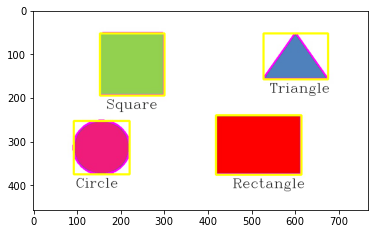

In [8]:
get_contour_shapes(contours)